In [85]:
import pandas as pd
import scipy 
import numpy as np
from math import sin, cos, pi, atan2, asin, sqrt
import matplotlib.pyplot as plt
from scipy import integrate
import Helper_Functions as hf

In [86]:
################## CONSTANTS ##################
# gravity
g = 9.81  # m/s^2
# m to ft
ft = 3.2884  # ft/m

## 22 Full-scale

In [98]:
################## DATA FRAME ##################
datafile = '../Data/Trunc_Fullscale1.csv'
fields = ['Timestamp', 'Pres',
  'Roll', 'Pitch', 'Yaw',
  'LinearAccelNed X', 'LinearAccelNed Y', 'LinearAccelNed Z',
  ]

df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)

################## INIT VECTORS ##################
all_time = df['Timestamp'].values

tdata = all_time
tdata = tdata - all_time[0]
L = tdata.shape[0]

In [99]:
ax_vn = df['LinearAccelNed X']* ft
ay_vn = df['LinearAccelNed Y']* ft
az_vn = df['LinearAccelNed Z']* -ft

ax_g22 = df['LinearAccelNed X']/9.8 #* ft
ay_g22 = df['LinearAccelNed Y']/9.8 #* ft
az_g22 = df['LinearAccelNed Z']/-9.8 #* -ft

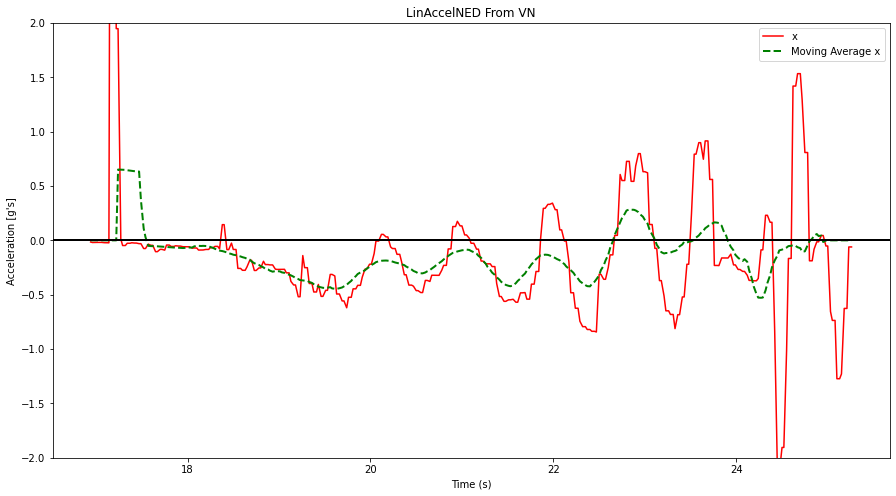

Estimated Wind Speed via Original IMU Signal: -0.00007448 m/s
Estimated Wind Speed via Moving Average: -0.00008304 m/s


In [100]:
start22 = 670
end22 = 1000
tdata22 = tdata[start22:end22]
axg22t = ax_g22[start22:end22]

n=25

#calculate moving average
axg22s = pd.Series(axg22t).rolling(window=n).mean().iloc[n-1:].values
new_axg22s = list(axg22s)
zero_padding_size = (len(tdata22) - len(list(axg22s))) // 2
for i in range(zero_padding_size):
    new_axg22s = [0] + list(new_axg22s) + [0]
while len(new_axg22s) < len(tdata22):
    new_axg22s = [0] + new_axg22s

fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l1 = ax.plot(tdata22, ax_g[start22:end22], color='red', label='x')
l2 = ax.plot(tdata22, new_axg22s, color='green', label='Moving Average x', linewidth=2, linestyle="--")
l2 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
plt.ylim((-2, 2))

ax.legend()
plt.show()

result_trapz_IMU = scipy.integrate.trapz(ax_g[start22:end22], dx=0.2E-6)
#result_simps_MA = scipy.integrate.simps(new_axg22s, dx=0.2E-6)
result_trapz_MA = scipy.integrate.trapz(new_axg22s, dx=0.2E-6)

print(f"Estimated Wind Speed via Original IMU Signal: {9.8*result_trapz_IMU:.8f} m/s")
print(f"Estimated Wind Speed via Moving Average: {9.8*result_trapz_MA:.8f} m/s")

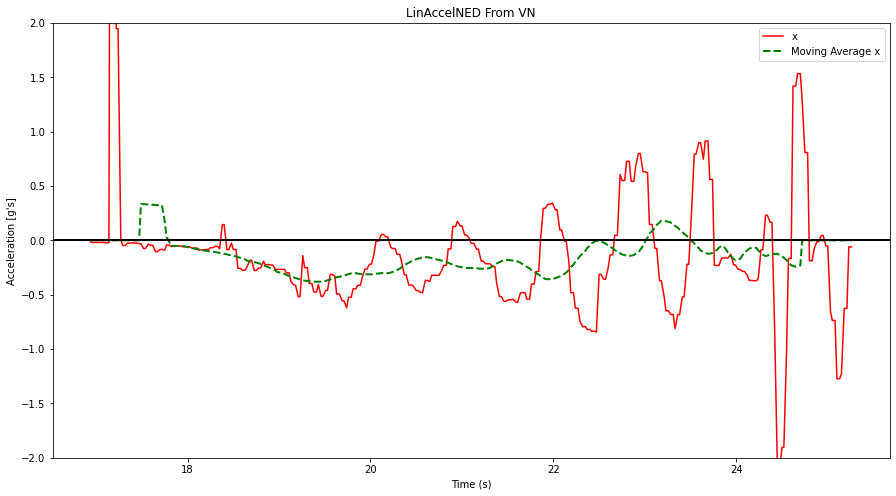

Estimated Wind Speed via Original IMU Signal: -0.00007448 m/s
Estimated Wind Speed via Moving Average: -0.00008775 m/s


In [101]:
n=45

#calculate moving average
axg22s = pd.Series(axg22t).rolling(window=n).mean().iloc[n-1:].values
new_axg22s = list(axg22s)
zero_padding_size = (len(tdata22) - len(list(axg22s))) // 2
for i in range(zero_padding_size):
    new_axg22s = [0] + list(new_axg22s) + [0]
while len(new_axg22s) < len(tdata22):
    new_axg22s = [0] + new_axg22s

fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l1 = ax.plot(tdata22, ax_g[start22:end22], color='red', label='x')
l2 = ax.plot(tdata22, new_axg22s, color='green', label='Moving Average x', linewidth=2, linestyle="--")
l2 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
plt.ylim((-2, 2))

ax.legend()
plt.show()

result_trapz_IMU = scipy.integrate.trapz(ax_g[start22:end22], dx=0.2E-6)
result_trapz_MA = scipy.integrate.trapz(new_axg22s, dx=0.2E-6)

print(f"Estimated Wind Speed via Original IMU Signal: {9.8*result_trapz_IMU:.8f} m/s")
print(f"Estimated Wind Speed via Moving Average: {9.8*result_trapz_MA:.8f} m/s")

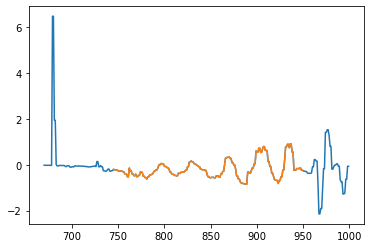

In [108]:
plt.plot(axg22t)
plt.plot(axg22t[75:280])
plt.show()

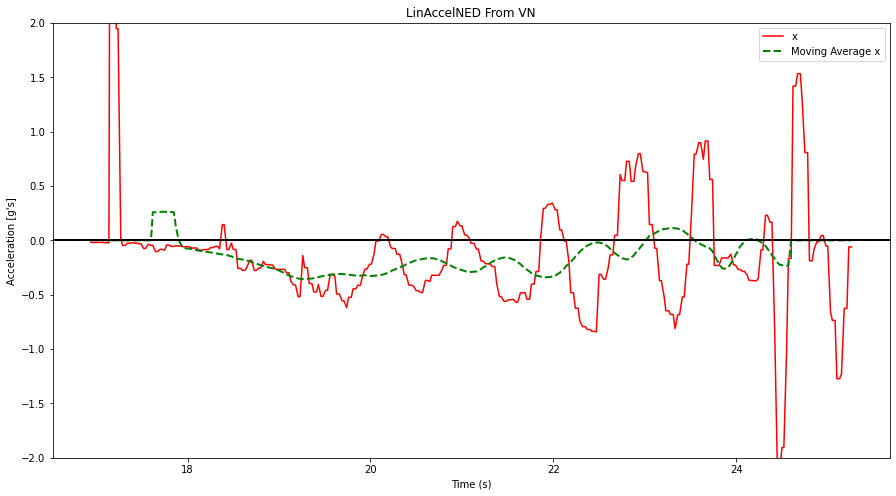

Estimated Wind Speed via Original IMU Signal: -0.00007448 m/s
Estimated Wind Speed via Moving Average: -0.00008643 m/s
Estimated Wind Speed via Original, Zoomed In: -0.00007306 m/s


In [109]:
n=55

#calculate moving average
axg22s = pd.Series(axg22t).rolling(window=n).mean().iloc[n-1:].values
new_axg22s = list(axg22s)
zero_padding_size = (len(tdata22) - len(list(axg22s))) // 2
for i in range(zero_padding_size):
    new_axg22s = [0] + list(new_axg22s) + [0]
while len(new_axg22s) < len(tdata22):
    new_axg22s = [0] + new_axg22s

fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l1 = ax.plot(tdata22, ax_g[start22:end22], color='red', label='x')
l2 = ax.plot(tdata22, new_axg22s, color='green', label='Moving Average x', linewidth=2, linestyle="--")
l2 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
plt.ylim((-2, 2))

ax.legend()
plt.show()

result_trapz_IMU = scipy.integrate.trapz(ax_g[start22:end22], dx=0.2E-6)
result_trapz_MA = scipy.integrate.trapz(new_axg22s, dx=0.2E-6)
result_trapz_ZOOM = scipy.integrate.trapz(axg22t[75:280], dx=0.2E-6)

print(f"Estimated Wind Speed via Original IMU Signal: {9.8*result_trapz_IMU:.8f} m/s")
print(f"Estimated Wind Speed via Moving Average: {9.8*result_trapz_MA:.8f} m/s")
print(f"Estimated Wind Speed via Original, Zoomed In: {9.8*result_trapz_ZOOM:.8f} m/s")

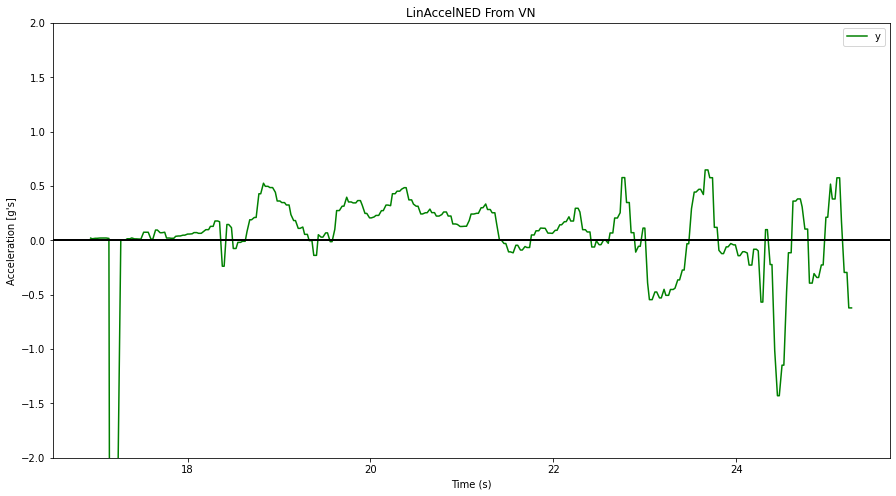

In [7]:
fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l1 = ax.plot(tdata22, ay_g[start22:end22], color='green', label='y')
l2 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
plt.ylim((-2, 2))

ax.legend()
plt.show()

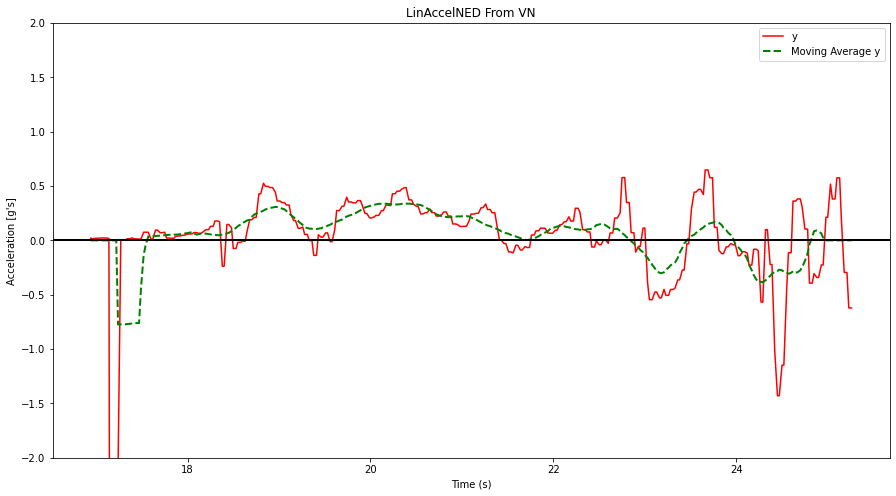

In [82]:
ayg22t = ay_g22[start22:end22]

n=25

#calculate moving average
ayg22s = pd.Series(ayg22t).rolling(window=n).mean().iloc[n-1:].values
new_ayg22s = list(ayg22s)
zero_padding_size = (len(tdata22) - len(list(ayg22s))) // 2
for i in range(zero_padding_size):
    new_ayg22s = [0] + list(new_ayg22s) + [0]
while len(new_ayg22s) < len(tdata22):
    new_ayg22s = [0] + new_ayg22s
    
fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l1 = ax.plot(tdata22, ay_g[start22:end22], color='red', label='y')
l2 = ax.plot(tdata22, new_ayg22s, color='green', label='Moving Average y', linewidth=2, linestyle="--")
l2 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
plt.ylim((-2, 2))

ax.legend()
plt.show()

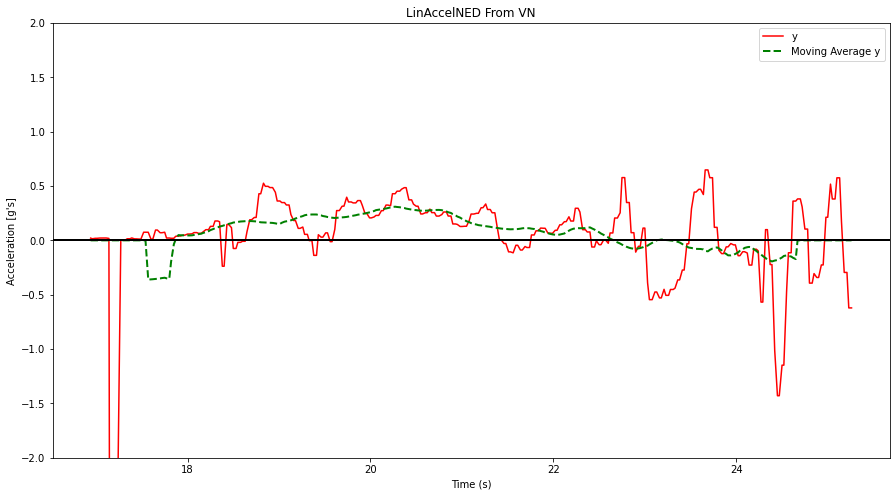

In [83]:
n=50

#calculate moving average
ayg22s = pd.Series(ayg22t).rolling(window=n).mean().iloc[n-1:].values
new_ayg22s = list(ayg22s)
zero_padding_size = (len(tdata22) - len(list(ayg22s))) // 2
for i in range(zero_padding_size):
    new_ayg22s = [0] + list(new_ayg22s) + [0]
while len(new_ayg22s) < len(tdata22):
    new_ayg22s = [0] + new_ayg22s
    
fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l1 = ax.plot(tdata22, ay_g[start22:end22], color='red', label='y')
l2 = ax.plot(tdata22, new_ayg22s, color='green', label='Moving Average y', linewidth=2, linestyle="--")
l2 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
plt.ylim((-2, 2))

ax.legend()
plt.show()

## 21 Full-scale

In [111]:
################## DATA FRAME ##################
datafile = '../Fullscale21.csv'
fields = ['Timestamp', 'Pres',
  'Roll', 'Pitch', 'Yaw',
  'LinearAccelNed X', 'LinearAccelNed Y', 'LinearAccelNed Z',
  ]

df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)

################## INIT VECTORS ##################
all_time = df['Timestamp'].values

tdata21 = all_time
tdata21 = tdata21 - all_time[0]
L = tdata21.shape[0]

In [112]:
ax_vn21 = df['LinearAccelNed X']* ft
ay_vn21 = df['LinearAccelNed Y']* ft
az_vn21 = df['LinearAccelNed Z']* -ft

ax_g21 = df['LinearAccelNed X']/9.8 #* ft
ay_g21 = df['LinearAccelNed Y']/9.8 #* ft
az_g21 = df['LinearAccelNed Z']/-9.8 #* -ft

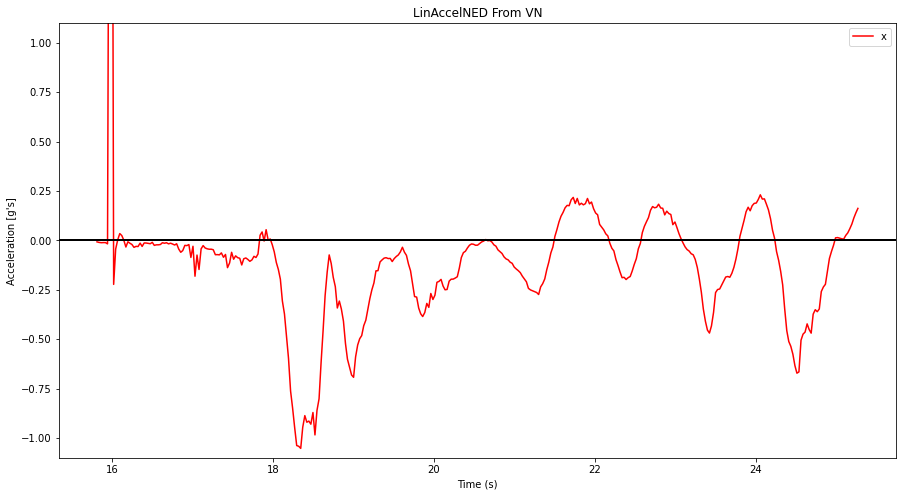

In [113]:
start21 = 625
end21 = 1000
tdata21 = tdata21[start21:end21]


fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata21, ax_g21[start21:end21], color='red', label='x')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
plt.ylim((-1.1, 1.1))

ax.legend()
plt.show()

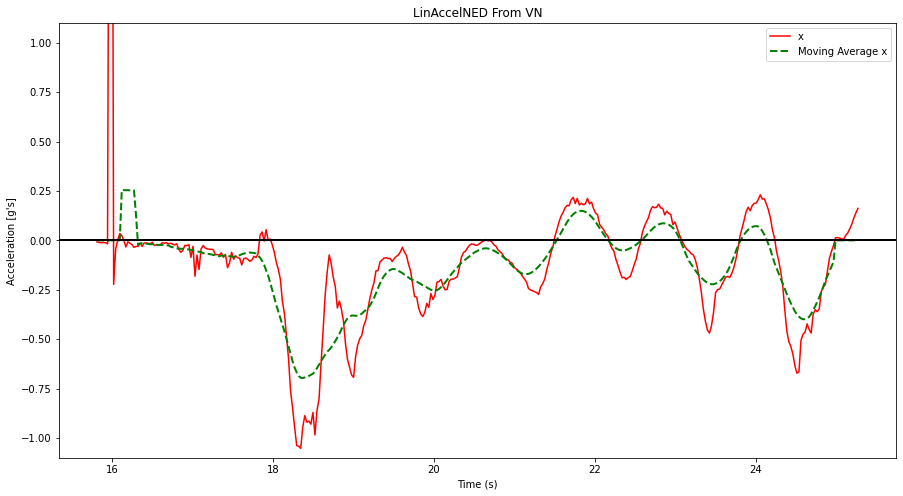

Estimated Wind Speed via Original IMU Signal: -0.00008790 m/s
Estimated Wind Speed via Moving Average: -0.00009673 m/s


In [119]:
n=25

#calculate moving average
axg21s = pd.Series(axg21t).rolling(window=n).mean().iloc[n-1:].values
new_axg21s = list(axg21s)
zero_padding_size = (len(tdata21) - len(list(axg21s))) // 2
for i in range(zero_padding_size):
    new_axg21s = [0] + list(new_axg21s) + [0]
while len(new_axg21s) < len(tdata21):
    new_axg21s = [0] + new_axg21s

fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata21, axg21t, color='red', label='x')
l2 = ax.plot(tdata21, new_axg21s, color='green', label='Moving Average x', linewidth=2, linestyle="--")
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
plt.ylim((-1.1, 1.1))

ax.legend()
plt.show()

result_trapz_IMU = scipy.integrate.trapz(axg21t, dx=0.2E-6)
result_trapz_MA = scipy.integrate.trapz(new_axg21s, dx=0.2E-6)

print(f"Estimated Wind Speed via Original IMU Signal: {9.8*result_trapz_IMU:.8f} m/s")
print(f"Estimated Wind Speed via Moving Average: {9.8*result_trapz_MA:.8f} m/s")

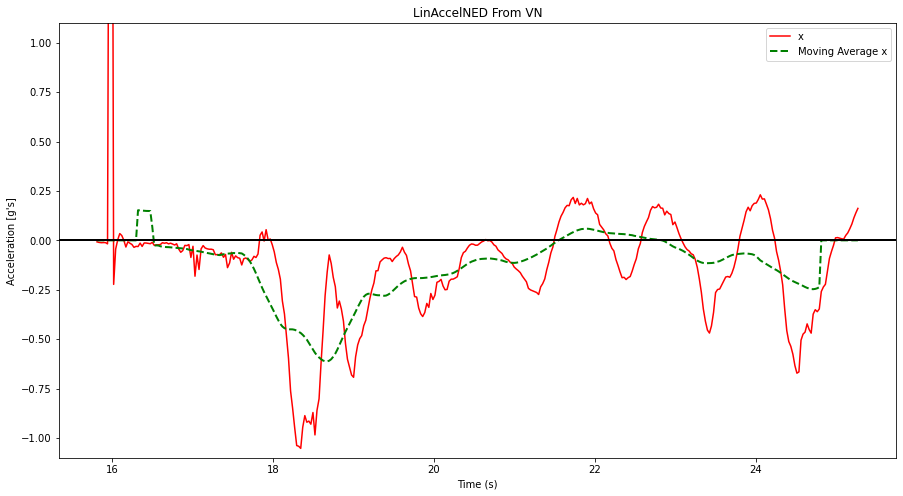

Estimated Wind Speed via Original IMU Signal: -0.00008790 m/s
Estimated Wind Speed via Moving Average: -0.00009328 m/s


In [120]:
n=40

#calculate moving average
axg21s = pd.Series(axg21t).rolling(window=n).mean().iloc[n-1:].values
new_axg21s = list(axg21s)
zero_padding_size = (len(tdata21) - len(list(axg21s))) // 2
for i in range(zero_padding_size):
    new_axg21s = [0] + list(new_axg21s) + [0]
while len(new_axg21s) < len(tdata21):
    new_axg21s = [0] + new_axg21s
    
fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata21, ax_g21[start21:end21], color='red', label='x')
l2 = ax.plot(tdata21, new_axg21s, color='green', label='Moving Average x', linewidth=2, linestyle="--")
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
plt.ylim((-1.1, 1.1))

ax.legend()
plt.show()

result_trapz_IMU = scipy.integrate.trapz(axg21t, dx=0.2E-6)
result_trapz_MA = scipy.integrate.trapz(new_axg21s, dx=0.2E-6)

print(f"Estimated Wind Speed via Original IMU Signal: {9.8*result_trapz_IMU:.8f} m/s")
print(f"Estimated Wind Speed via Moving Average: {9.8*result_trapz_MA:.8f} m/s")

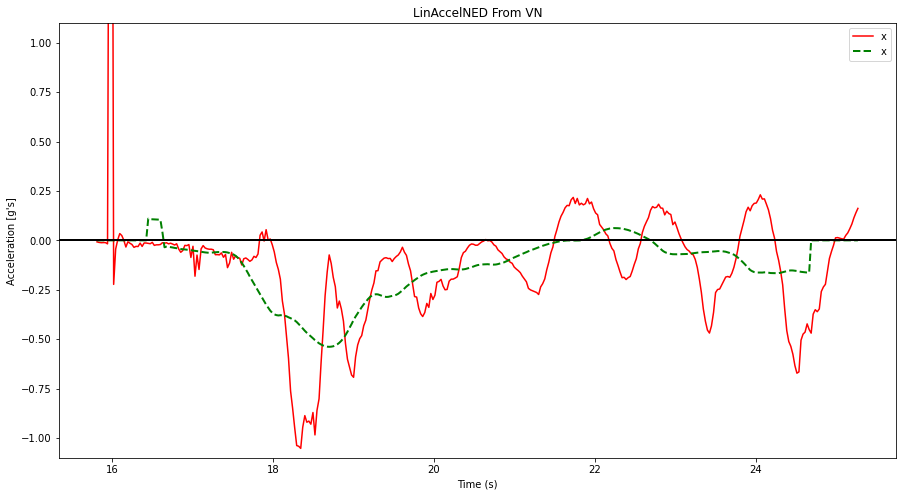

In [60]:
n=50

#calculate moving average
axg21s = pd.Series(axg21t).rolling(window=n).mean().iloc[n-1:].values
new_axg21s = list(axg21s)
zero_padding_size = (len(tdata21) - len(list(axg21s))) // 2
for i in range(zero_padding_size):
    new_axg21s = [0] + list(new_axg21s) + [0]
while len(new_axg21s) < len(tdata21):
    new_axg21s = [0] + new_axg21s
    
fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata21, ax_g21[start21:end21], color='red', label='x')
l2 = ax.plot(tdata21, new_axg21s, color='green', label='x', linewidth=2, linestyle="--")
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
plt.ylim((-1.1, 1.1))

ax.legend()
plt.show()

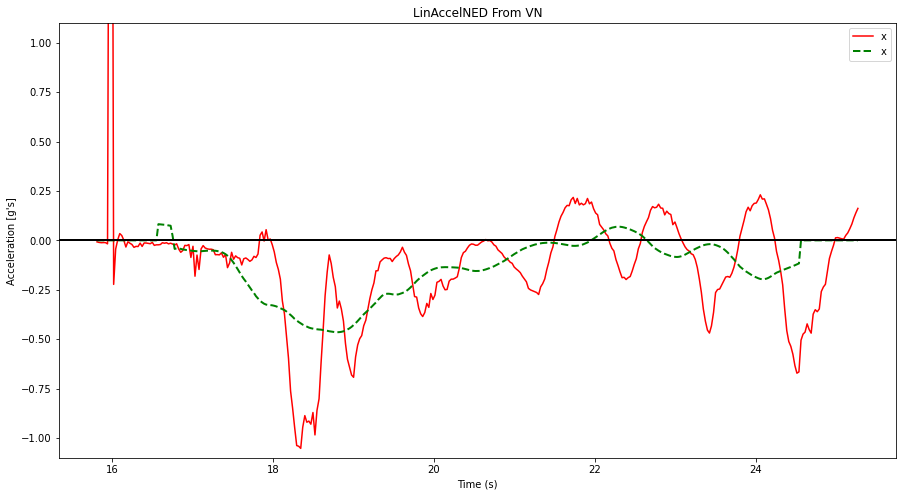

In [61]:
n=60

#calculate moving average
axg21s = pd.Series(axg21t).rolling(window=n).mean().iloc[n-1:].values
new_axg21s = list(axg21s)
zero_padding_size = (len(tdata21) - len(list(axg21s))) // 2
for i in range(zero_padding_size):
    new_axg21s = [0] + list(new_axg21s) + [0]
while len(new_axg21s) < len(tdata21):
    new_axg21s = [0] + new_axg21s
    
fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata21, ax_g21[start21:end21], color='red', label='x')
l2 = ax.plot(tdata21, new_axg21s, color='green', label='x', linewidth=2, linestyle="--")
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
plt.ylim((-1.1, 1.1))

ax.legend()
plt.show()

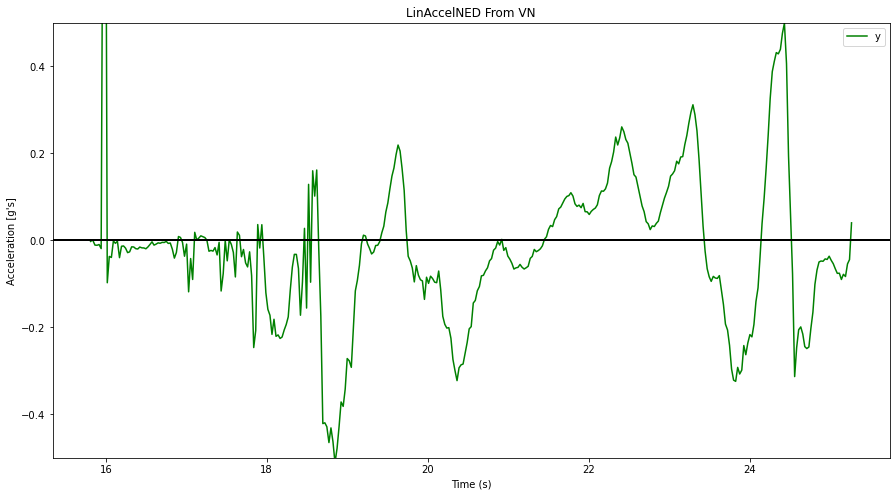

In [14]:
fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata21, ay_g21[start21:end21], color='green', label='y')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
plt.ylim((-0.5, 0.5))

ax.legend()
plt.show()

In [63]:
ayg21t = ay_g21[start21:end21]

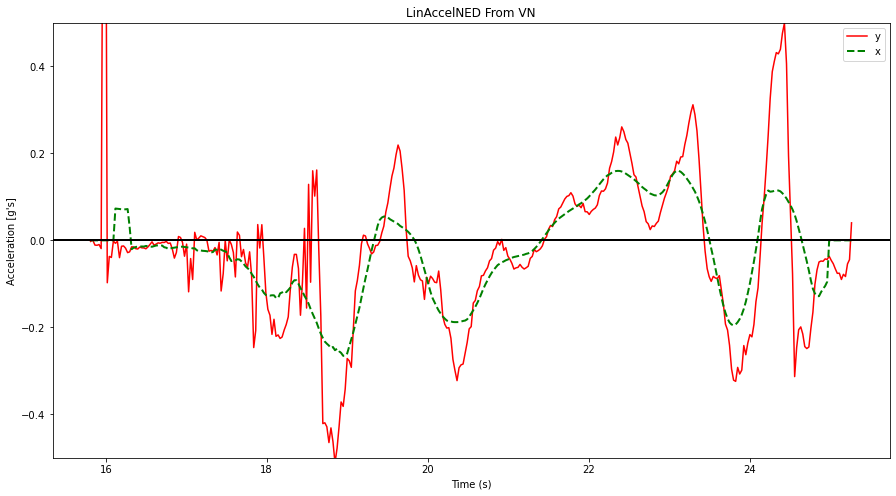

In [64]:
n=25

#calculate moving average
ayg21s = pd.Series(ayg21t).rolling(window=n).mean().iloc[n-1:].values
new_ayg21s = list(ayg21s)
zero_padding_size = (len(tdata21) - len(list(ayg21s))) // 2
for i in range(zero_padding_size):
    new_ayg21s = [0] + list(new_ayg21s) + [0]
while len(new_ayg21s) < len(tdata21):
    new_ayg21s = [0] + new_ayg21s
    
fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata21, ay_g21[start21:end21], color='red', label='y')
l2 = ax.plot(tdata21, new_ayg21s, color='green', label='x', linewidth=2, linestyle="--")
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
plt.ylim((-0.5, 0.5))

ax.legend()
plt.show()

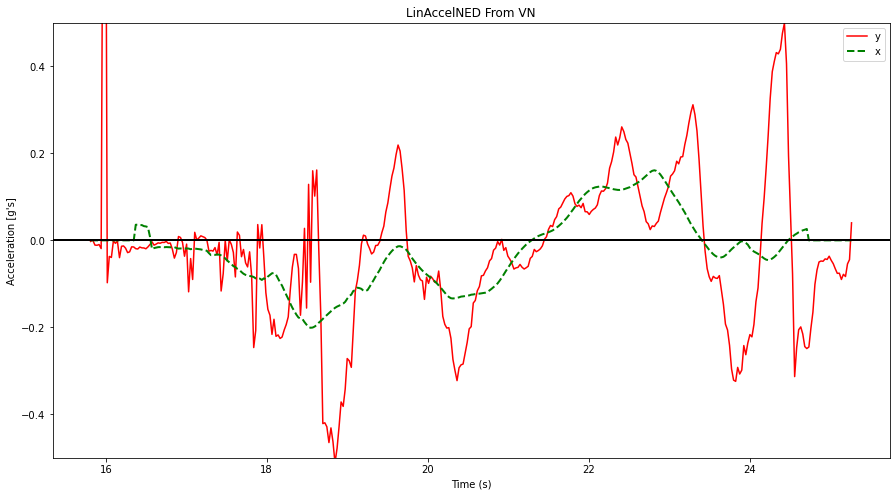

In [67]:
n=45

#calculate moving average
ayg21s = pd.Series(ayg21t).rolling(window=n).mean().iloc[n-1:].values
new_ayg21s = list(ayg21s)
zero_padding_size = (len(tdata21) - len(list(ayg21s))) // 2
for i in range(zero_padding_size):
    new_ayg21s = [0] + list(new_ayg21s) + [0]
while len(new_ayg21s) < len(tdata21):
    new_ayg21s = [0] + new_ayg21s
    
fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata21, ay_g21[start21:end21], color='red', label='y')
l2 = ax.plot(tdata21, new_ayg21s, color='green', label='x', linewidth=2, linestyle="--")
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
plt.ylim((-0.5, 0.5))

ax.legend()
plt.show()

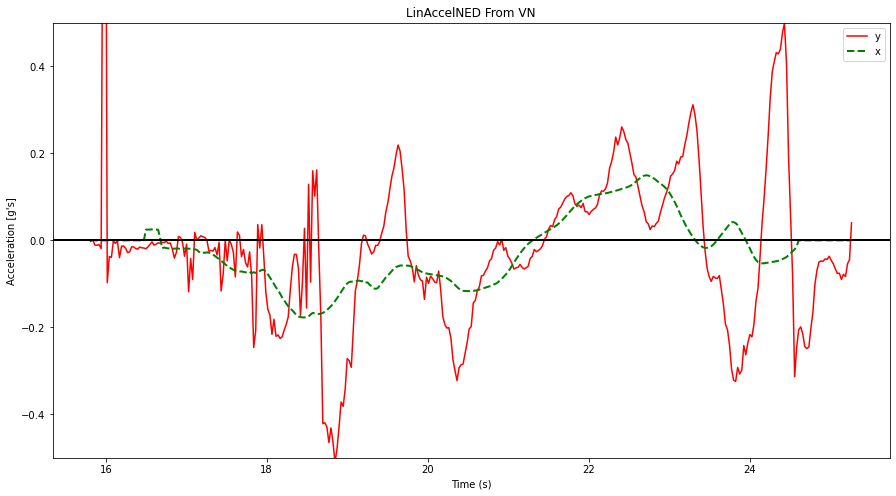

In [66]:
n=55

#calculate moving average
ayg21s = pd.Series(ayg21t).rolling(window=n).mean().iloc[n-1:].values
new_ayg21s = list(ayg21s)
zero_padding_size = (len(tdata21) - len(list(ayg21s))) // 2
for i in range(zero_padding_size):
    new_ayg21s = [0] + list(new_ayg21s) + [0]
while len(new_ayg21s) < len(tdata21):
    new_ayg21s = [0] + new_ayg21s
    
fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata21, ay_g21[start21:end21], color='red', label='y')
l2 = ax.plot(tdata21, new_ayg21s, color='green', label='x', linewidth=2, linestyle="--")
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
plt.ylim((-0.5, 0.5))

ax.legend()
plt.show()

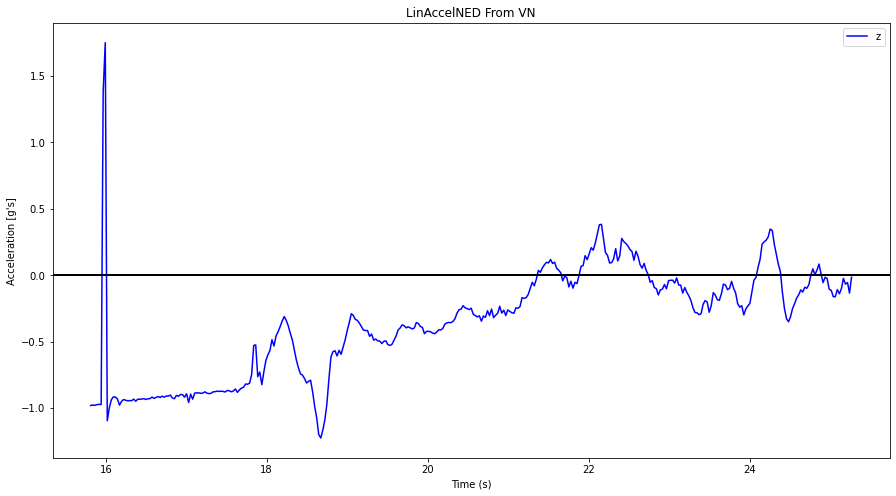

In [15]:
fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata21[start21:end21], az_g21[start21:end21], color='blue', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
#plt.ylim((-2, 2))

ax.legend()
plt.show()